In [17]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler

# 🟢 Bước 1: Tải mô hình đã train
Macophieu = "BSI.VN"
prop = 'Close'
model = tf.keras.models.load_model(f'/home/phung/jnotebook/source/Tuan9/model/{Macophieu}_{prop}.keras')

# 🟢 Bước 2: Tải dữ liệu từ Yahoo Finance
ticker = "BSI.VN"  # Thay đổi mã cổ phiếu nếu cần
n_past_days = 60  # Sử dụng 60 ngày gần nhất để dự đoán
future_days = 7   # Dự đoán 3 ngày tiếp theo

# Lấy dữ liệu từ Yahoo Finance
today = pd.to_datetime("2025-01-15")  # Ngày hiện tại (có thể thay đổi)
start_date = today - pd.Timedelta(days=n_past_days + 30)  # Lấy thêm để đảm bảo đủ dữ liệu
df = yf.download(ticker, start=start_date, end=today)

# 🟢 Bước 3: Chuẩn bị dữ liệu đầu vào
scaler = MinMaxScaler(feature_range=(0, 1))
close_prices = df["Close"].values.reshape(-1, 1)
close_prices_scaled = scaler.fit_transform(close_prices)




[*********************100%***********************]  1 of 1 completed


In [19]:
x_input = close_prices_scaled[-n_past_days:].reshape(1, n_past_days, 1)

In [21]:
future_predictions = []
for i in range(future_days):
    next_day_pred = model.predict(x_input)
    next_day_pred_real = scaler.inverse_transform(next_day_pred)[0][0]
    future_predictions.append(next_day_pred_real)

    # Cập nhật dữ liệu đầu vào
    x_input = np.append(x_input[:, 1:, :], next_day_pred.reshape(1, 1, 1), axis=1)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


In [23]:
for i in range(future_days):
    future_date = today + pd.Timedelta(days=i+1)
    print(f"Dự đoán giá {ticker} ngày {future_date.strftime('%d/%m/%Y')}: {future_predictions[i]:.2f}")

Dự đoán giá BSI.VN ngày 16/01/2025: 43814.40
Dự đoán giá BSI.VN ngày 17/01/2025: 43788.08
Dự đoán giá BSI.VN ngày 18/01/2025: 43794.98
Dự đoán giá BSI.VN ngày 19/01/2025: 43788.18
Dự đoán giá BSI.VN ngày 20/01/2025: 43771.67
Dự đoán giá BSI.VN ngày 21/01/2025: 43754.11
Dự đoán giá BSI.VN ngày 22/01/2025: 43740.39


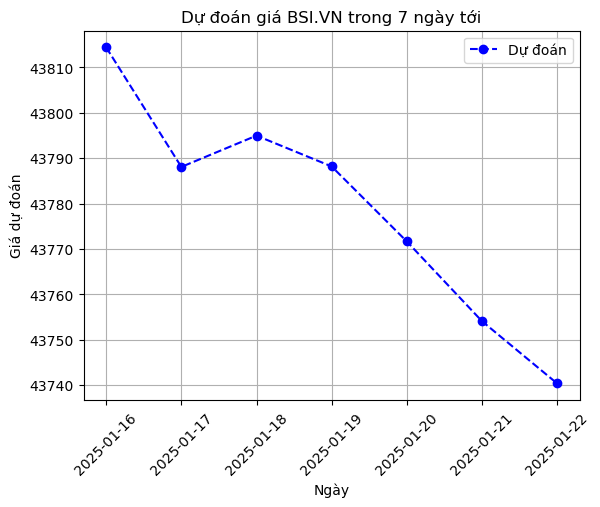

In [25]:
dates = [today + pd.Timedelta(days=i+1) for i in range(future_days)]
plt.plot(dates, future_predictions, marker='o', linestyle='dashed', color='b', label="Dự đoán")
plt.xlabel("Ngày")
plt.ylabel("Giá dự đoán")
plt.title(f"Dự đoán giá {ticker} trong 7 ngày tới")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()